# 1. Importing packages

In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt 
import numpy as np
pi=np.pi

# 2. Defining functions (To avoid redundancy)

In [3]:
def istate():
    qc=QuantumCircuit(1)
    return qc
def cplot(qc):
    backend=Aer.get_backend('statevector_simulator')
    result=execute(qc,backend=backend).result()
    print(result.get_statevector())
    return plot_bloch_multivector(result.get_statevector())

# 3. Varying Phases 

## 3.1 H,Z,X gates

[0.70710678+0.j 0.70710678+0.j]


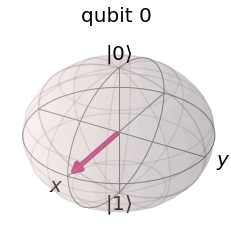

In [4]:
qc=istate()
qc.h(0)
cplot(qc)

[0.+0.j 1.+0.j]


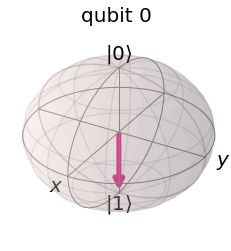

In [5]:
qc=istate()
qc.x(0)
cplot(qc)

[1.+0.j 0.+0.j]


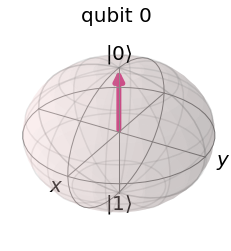

In [6]:
qc=istate()
qc.z(0)
cplot(qc)

The phase change in H,X is visible but Z isn't because of the fact that the initial qubit state was in eigen state of the Z gate (basis)

## 3.2 ZH,SH,TH and combinations

We already know S = $\sqrt[2]{Z}$ and T = $\sqrt[4]{Z}$. In other words the phase of Z = $\pi$ , S = $\pi/2$ and T = $\pi/4$.

[ 0.70710678+0.j -0.70710678+0.j]


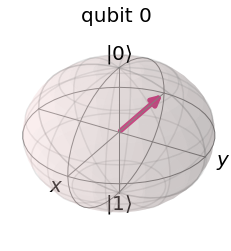

In [7]:
qc=istate()
qc.h(0)
qc.z(0)
cplot(qc)

[0.70710678+0.j         0.        +0.70710678j]


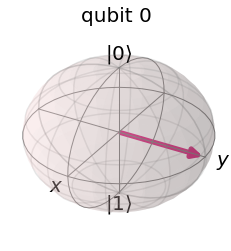

In [8]:
qc=istate()
qc.h(0)
qc.s(0)
cplot(qc)

[0.70710678+0.j  0.5       +0.5j]


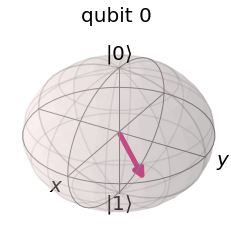

In [9]:
qc=istate()
qc.h(0)
qc.t(0)
cplot(qc)

[ 0.70710678+0.j         -0.        -0.70710678j]


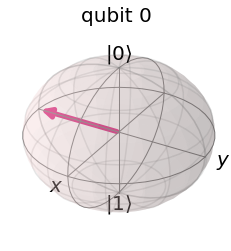

In [10]:
qc=istate()
qc.h(0)
qc.z(0)
qc.s(0)
cplot(qc)

[ 0.70710678+0.j  -0.5       -0.5j]


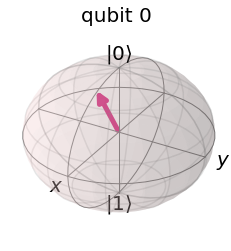

In [11]:
qc=istate()
qc.h(0)
qc.z(0)
qc.t(0)
cplot(qc)

[ 0.70710678+0.j  -0.5       +0.5j]


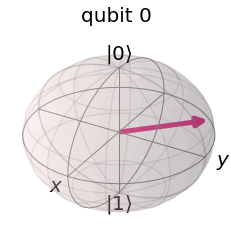

In [12]:
qc=istate()
qc.h(0)
qc.s(0)
qc.t(0)
cplot(qc)

# 4  Understanding U3 rotations 
## 4.1 Comparing u1,u2,u3

[ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]


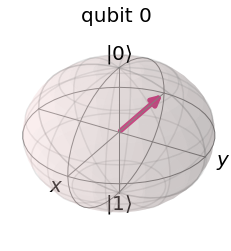

In [20]:
qc=istate()
qc.h(0)         #commenting this line will show you u1 doesn't show any rotation
qc.u1(pi,0)
cplot(qc)

This is equivalent to an arbitary rotation around the Z basis
<br> u1($\lambda$,qubit)
<br> At $\lambda$ = $\pi$ it acts same as Z gate
<br> The U1 matrix is U3 substituted for $\theta = 0$ and $\phi = 0$
$$
\left(\begin{array}{cc} 
1 & 0\\
0 & e^{i(\phi+\lambda)}
\end{array}\right)
$$ 

[0.70710678+0.j 0.70710678+0.j]


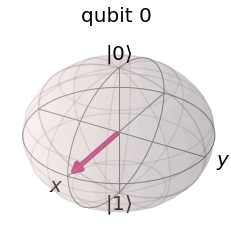

In [30]:
qc=istate()
qc.u2(0,0,0)
cplot(qc)

u2($\phi$,$\lambda$,qubit)
<br> The U2 matrix is given by U3 substitued for $\theta = \pi/2$ 
<br>
$$ 1/\sqrt[2]{2}
\left(\begin{array}{cc} 
1 & -e^{i\lambda}\\
e^{i\phi} & e^{i(\phi+\lambda)}
\end{array}\right)
$$ 

[ 7.07106781e-01+0.j         -1.29893408e-16-0.70710678j]


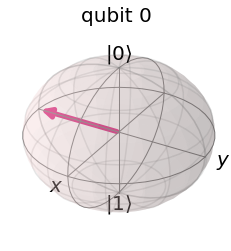

In [15]:
qc=istate()
qc.u3(pi/2,3*pi/2,0,0)
cplot(qc)

U3($\theta,\phi,\lambda$,qubit)
<br>The U3 matrix is given by 
$$ 
\left(\begin{array}{cc} 
cos(\theta/2) & -e^{i\lambda}sin(\theta/2)\\
e^{i\phi}sin(\theta/2) & e^{i(\phi+\lambda)}cos(\theta/2)
\end{array}\right)
$$ 